# Model selection in the Gauss Markov Model

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [198]:
def estimated_sigma(y, y_hat, biased=True):
    """
    Computes the MLE or min variance unbiased estimate (MVUE) of sigma
    """
    n = len(y)
    RSS = np.sum((y - y_hat)**2)
    if biased:
        return np.sqrt(RSS / n)
    else:
        return np.sqrt(RSS / (n - 1))

def epe(Z, b, sigma, p):
    """
    The expected prediction error EPE(p)
    """
    mu = Z @ b
    mu_p = Z[:,:p] @ b[:p]
    n = len(y)
    err = np.sum((mu - mu_p)**2)
    EPE = err / n + sigma**2 * (1 + p / n)
    return EPE

def solve_lr(y, Z, p):
    """
    Computes the linear regression coefficients
    """
    Z = Z[:, :p]
    b_hat = np.linalg.inv(Z.T @ Z) @ Z.T @ y.reshape(len(y), 1)
    return b_hat

def epe_hat(y, Z, b_hat, sigma, p):
    n = len(y)
    y_hat = Z[:,:p] @ b[:p]
    RSS = np.sum((y - y_hat)**2)
    return RSS / n + 2 * p / n * sigma**2

In [185]:
n = 10
sigma = 1
z1 = np.ones(n)
z2 = np.arange(1, n+1)
Z = np.vstack((z1, z2)).T
changepoint = sigma / np.sqrt(np.sum([i**2 for i in range(1, n+1)]))

In [186]:
epe_diffs = []
beta2_list = np.arange(0,1,0.0001)
for beta2 in beta2_list:
    b = np.asarray([1, beta2])
    y = Z @ b + np.random.normal(0, sigma**2, (n,))
    epe1 = epe(Z, b, sigma, p=1)
    epe2 = epe(Z, b, sigma, p=2)
    epe_diffs.append(epe2 - epe1)

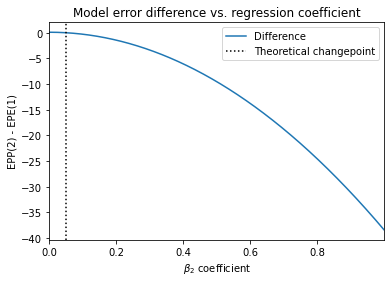

In [188]:
plt.plot(beta2_list, epe_diffs, label='Difference')
plt.xlabel(r'$\beta_2$ coefficient')
plt.ylabel('EPP(2) - EPE(1)')
plt.axvline(changepoint, ls=':', c='black', label='Theoretical changepoint')
plt.title('Model error difference vs. regression coefficient')
plt.legend()
plt.margins(x=0)
plt.savefig('/Users/rflperry/Documents/JHU/stat_theory_final_model_selection.png')
plt.show()

In [184]:
beta2_list[np.argmin(np.abs(epe_diffs))] - changepoint

3.5280856237447644e-05

In [191]:
n = 10
sigma = 1
z1 = np.ones(n)
z2 = np.arange(1, n+1)
Z = np.vstack((z1, z2)).T
changepoint = sigma / np.sqrt(np.sum([i**2 for i in range(1, n+1)]))

In [202]:
epe_diffs = []
beta2_list = np.arange(0,1,0.001)
for beta2 in beta2_list:
    b = np.asarray([1, beta2])
    y = Z @ b + np.random.normal(0, sigma**2, (n,))
    
    b_hat_1 = solve_lr(y, Z, p=1)
    b_hat_2 = solve_lr(y, Z, p=2)
    sigma_hat = estimated_sigma(y, Z @ b_hat, biased=False)

    epe1 = epe_hat(y, Z, b_hat_1, sigma, p=1)
    epe2 = epe_hat(y, Z, b_hat_2, sigma, p=2)
    epe_diffs.append(epe2 - epe1)

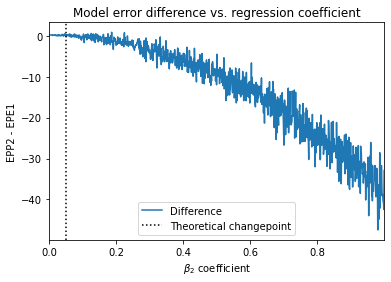

In [204]:
plt.plot(beta2_list, epe_diffs, label='Difference')
plt.xlabel(r'$\beta_2$ coefficient')
plt.ylabel('EPP2 - EPE1')
plt.axvline(changepoint, ls=':', c='black', label='Theoretical changepoint')
plt.title('Model error difference vs. regression coefficient')
plt.legend()
plt.margins(x=0)
plt.savefig('/Users/rflperry/Documents/JHU/stat_theory_final_model_selection_hat.png')
plt.show()

In [201]:
beta2_list[np.argmin(np.abs(epe_diffs))] - changepoint

0.02433528085623745